In [2]:
import matplotlib
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("speeddating.csv")
df_trunc=df.drop(['expected_num_interested_in_me', 'expected_num_matches'], axis=1)
df_2_trunc=df_trunc.drop(['shared_interests_o', 'shared_interests_partner'], axis=1)
trunc_2_cols=df_2_trunc.columns.to_list()
for index, row in df_2_trunc.iterrows():
    nan_present=0
    for each in trunc_2_cols:
        if str(df_2_trunc.iloc[index][each])=="?":
            df_2_trunc.at[index,'has_null']=1
            nan_present=1
            break
    if nan_present==0:
        df_2_trunc.at[index,'has_null']=0
print(df_2_trunc['has_null'].mean())
df_final = df_2_trunc[df_2_trunc.has_null == 0]
print(df_final)

df_final=df_final.drop(['has_null', 'wave'], axis=1)
cols_ord_list=[]
for index, row in df_2_trunc.iterrows():
    nan_present=0
    for each in trunc_2_cols:
        x = str(df_2_trunc.iloc[index][each])
        if x[0]=="[":
            cols_ord_list.append(each)
    break
cols_ord_list

0.2282167581761757
      has_null  wave  gender age age_o  d_age d_d_age  \
0            0     1  female  21    27      6   [4-6]   
1            0     1  female  21    22      1   [0-1]   
3            0     1  female  21    23      2   [2-3]   
4            0     1  female  21    24      3   [2-3]   
5            0     1  female  21    25      4   [4-6]   
...        ...   ...     ...  ..   ...    ...     ...   
8369         0    21    male  25    22      3   [2-3]   
8370         0    21    male  25    27      2   [2-3]   
8372         0    21    male  25    24      1   [0-1]   
8374         0    21    male  25    24      1   [0-1]   
8377         0    21    male  25    22      3   [2-3]   

                                         race  \
0     'Asian/Pacific Islander/Asian-American'   
1     'Asian/Pacific Islander/Asian-American'   
3     'Asian/Pacific Islander/Asian-American'   
4     'Asian/Pacific Islander/Asian-American'   
5     'Asian/Pacific Islander/Asian-American'   
..

['d_d_age',
 'd_importance_same_race',
 'd_importance_same_religion',
 'd_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'd_attractive_o',
 'd_sinsere_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_ambitous_o',
 'd_shared_interests_o',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 'd_shared_interests_important',
 'd_attractive',
 'd_sincere',
 'd_intelligence',
 'd_funny',
 'd_ambition',
 'd_attractive_partner',
 'd_sincere_partner',
 'd_intelligence_partner',
 'd_funny_partner',
 'd_ambition_partner',
 'd_shared_interests_partner',
 'd_sports',
 'd_tvsports',
 'd_exercise',
 'd_dining',
 'd_museums',
 'd_art',
 'd_hiking',
 'd_gaming',
 'd_clubbing',
 'd_reading',
 'd_tv',
 'd_theater',
 'd_movies',
 'd_concerts',
 'd_music',
 'd_shopping',
 'd_yoga',
 'd_interests_correlate',
 'd_expected_happy_with_sd_people',
 'd

In [4]:
## One-Hot Encoding
df_final['race'] = np.where(df_final['race'] == "'Asian/Pacific Islander/Asian-American'", 
                            "Asian/Pacific Islander/Asian-American",
                   np.where(df_final['race'] == "'Black/African American'", 
                            "Black/African American",
                   np.where(df_final['race'] == "'Latino/Hispanic American'", 
                            "Latino/Hispanic American", 
                   np.where(df_final['race'] == "?", "Unknown", 
                   np.where(df_final['race'] == "European/Caucasian-American", 
                            "European/Caucasian-American",
                   "Other")))))

df_final['race_o'] = np.where(df_final['race_o'] == "'Asian/Pacific Islander/Asian-American'", 
                            "Asian/Pacific Islander/Asian-American",
                   np.where(df_final['race_o'] == "'Black/African American'", 
                            "Black/African American",
                   np.where(df_final['race_o'] == "'Latino/Hispanic American'", 
                            "Latino/Hispanic American", 
                   np.where(df_final['race_o'] == "?", "Unknown", 
                   np.where(df_final['race_o'] == "European/Caucasian-American", 
                            "European/Caucasian-American",
                   "Other")))))

df_final = df_final.join(pd.get_dummies(df_final.loc[:,["gender", "race", "race_o", "field"]], drop_first = True))
df_final = df_final.drop(["gender", "race", "race_o", "field"], axis = 1)
df_final

,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,...,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_working
0,21,27,6,[4-6],0,2,4,[2-5],[2-5],35,...,0,0,0,0,0,0,0,0,0,0
1,21,22,1,[0-1],0,2,4,[2-5],[2-5],60,...,0,0,0,0,0,0,0,0,0,0
3,21,23,2,[2-3],0,2,4,[2-5],[2-5],30,...,0,0,0,0,0,0,0,0,0,0
4,21,24,3,[2-3],0,2,4,[2-5],[2-5],30,...,0,0,0,0,0,0,0,0,0,0
5,21,25,4,[4-6],0,2,4,[2-5],[2-5],50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8369,25,22,3,[2-3],1,1,1,[0-1],[0-1],10,...,0,0,0,0,0,0,0,0,0,0
8370,25,27,2,[2-3],0,1,1,[0-1],[0-1],10,...,0,0,0,0,0,0,0,0,0,0
8372,25,24,1,[0-1],1,1,1,[0-1],[0-1],10,...,0,0,0,0,0,0,0,0,0,0
8374,25,24,1,[0-1],0,1,1,[0-1],[0-1],50,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## Take a quick look at the levels of the categorical variables
categorical_vars_levels = [sorted(df_final[cols_ord_list[i]].unique()) for i in range(df_final[cols_ord_list].shape[1])]
categorical_vars_levels[:10]

[['[0-1]', '[2-3]', '[4-6]', '[7-37]'],
 ['[0-1]', '[2-5]', '[6-10]'],
 ['[0-1]', '[2-5]', '[6-10]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-15]', '[16-20]', '[21-100]'],
 ['[0-5]', '[6-8]', '[9-10]']]

In [6]:
from sklearn.preprocessing import OrdinalEncoder

df_final_copy = df_final.copy()
for c in categorical_vars_levels:
  # Initialize a new ordinal encoder for each different categorical level
  ode = OrdinalEncoder(categories = [c])
  for i in range(len(cols_ord_list)):
    # check what columns are of the same level as one in the current loop 
    if set(df_final_copy.loc[:,cols_ord_list[i]]) == set(c):
      df_final_copy.loc[:, [cols_ord_list[i]]] = ode.fit_transform(df_final_copy.loc[:, [cols_ord_list[i]]])

In [7]:
# sanity check that compares the transformed df with the original df to see if the ordinal encoder works correctly
df_final_copy.loc[:,cols_ord_list].head()

,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,...,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,...,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
5,2.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [8]:
# sanity check that compares the transformed df with the original df to see if the ordinal encoder works correctly
df_final.loc[:,cols_ord_list].head()

,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,[4-6],[2-5],[2-5],[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],[6-8],...,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
1,[0-1],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],[6-8],...,[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
3,[2-3],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],[6-8],...,[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
4,[2-3],[2-5],[2-5],[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],[6-8],...,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
5,[4-6],[2-5],[2-5],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],[6-8],...,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]


In [9]:
X=df_final_copy.drop(['decision', 'decision_o','match'], axis = 1)
y=df_final_copy['match']

In [10]:
y.mean()

0.1721311475409836

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

In [12]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X

,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,...,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_working
0,21,27,6,2.0,0,2,4,1.0,1.0,35,...,0,0,0,0,0,0,0,0,0,0
1,21,22,1,0.0,0,2,4,1.0,1.0,60,...,0,0,0,0,0,0,0,0,0,0
3,21,23,2,1.0,0,2,4,1.0,1.0,30,...,0,0,0,0,0,0,0,0,0,0
4,21,24,3,1.0,0,2,4,1.0,1.0,30,...,0,0,0,0,0,0,0,0,0,0
5,21,25,4,2.0,0,2,4,1.0,1.0,50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8369,25,22,3,1.0,1,1,1,0.0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
8370,25,27,2,1.0,0,1,1,0.0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
8372,25,24,1,0.0,1,1,1,0.0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
8374,25,24,1,0.0,0,1,1,0.0,0.0,50,...,0,0,0,0,0,0,0,0,0,0


## Resampling

In [13]:
rus = RandomUnderSampler(replacement = False, random_state = 42)
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)

X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resample_rus, y_train_resample_rus = rus.fit_resample(X_train_resample, y_train_resample)
X_train_resample_ros, y_train_resample_ros = ros.fit_resample(X_train_resample, y_train_resample)
X_train_resample_smote, y_train_resample_smote = smote.fit_resample(X_train_resample, y_train_resample)

print("Random Undersampling Value Counts:\n", y_train_resample_rus.value_counts(), "\n")
print("Random Oversampling Value Counts:\n", y_train_resample_ros.value_counts(), "\n")
print("SMOTE Oversampling Value Counts:\n", y_train_resample_smote.value_counts(), "\n")

Random Undersampling Value Counts:
 0    888
1    888
Name: match, dtype: int64 

Random Oversampling Value Counts:
 0    4284
1    4284
Name: match, dtype: int64 

SMOTE Oversampling Value Counts:
 0    4284
1    4284
Name: match, dtype: int64 



In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

# **Logistic Regression**

Training Accuracy: 0.8575019334880124
Production Accuracy: 0.848531684698609
Precision Score: 0.589404
Recall Score: 0.399103
F1 Score: 0.475936


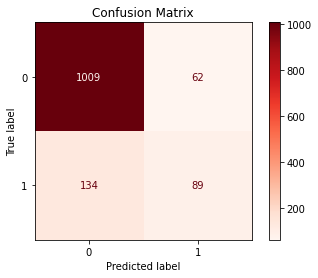

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
model = LogisticRegression(random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

precision = precision_score(y_true=y_test, y_pred= predict_test_lrc)
print("Precision Score: %f" % precision)
recall = recall_score(y_true=y_test, y_pred= predict_test_lrc)
print("Recall Score: %f" % recall)
f1 = f1_score(y_true = y_test, y_pred = predict_test_lrc)
print("F1 Score: %f" %f1)

ConfusionMatrixDisplay.from_estimator(lrc, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.7602474864655839
Production Accuracy: 0.7426584234930448
Precision Score: 0.384937
Recall Score: 0.825112
F1 Score: 0.524964


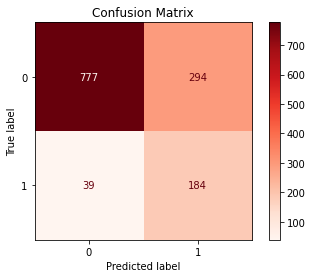

In [16]:
# Logistic regression model using dataset after random undersampling
# Seems like it's not doing well
model = LogisticRegression(random_state=0)
lrc_rus = model.fit(X_train_resample_rus, y_train_resample_rus)
predict_train_lrc_rus = lrc_rus.predict(X_train)
predict_test_lrc_rus = lrc_rus.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc_rus))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc_rus))

precision_rus = precision_score(y_true=y_test, y_pred= predict_test_lrc_rus)
print("Precision Score: %f" % precision_rus)
recall_rus = recall_score(y_true=y_test, y_pred= predict_test_lrc_rus)
print("Recall Score: %f" % recall_rus)
f1_rus = f1_score(y_true = y_test, y_pred = predict_test_lrc_rus)
print("F1 Score: %f" %f1_rus)
ConfusionMatrixDisplay.from_estimator(lrc_rus, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.779969064191802
Production Accuracy: 0.7627511591962906
Precision Score: 0.403670
Recall Score: 0.789238
F1 Score: 0.534143


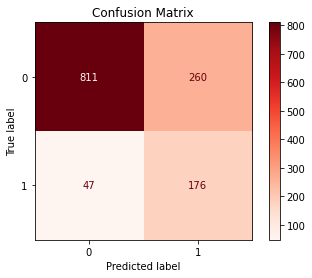

In [17]:
# Logistic regression model using dataset after random oversampling
# Slightly better than undersampling
model = LogisticRegression(random_state=0)
lrc_ros = model.fit(X_train_resample_ros, y_train_resample_ros)
predict_train_lrc_ros = lrc_ros.predict(X_train)
predict_test_lrc_ros = lrc_ros.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc_ros))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc_ros))

precision_ros = precision_score(y_true=y_test, y_pred= predict_test_lrc_ros)
print("Precision Score: %f" % precision_ros)
recall_ros = recall_score(y_true=y_test, y_pred= predict_test_lrc_ros)
print("Recall Score: %f" % recall_ros)
f1_ros = f1_score(y_true = y_test, y_pred = predict_test_lrc_ros)
print("F1 Score: %f" %f1_ros)
ConfusionMatrixDisplay.from_estimator(lrc_ros, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.7938901778808971
Production Accuracy: 0.7936630602782071
Precision Score: 0.439891
Recall Score: 0.721973
F1 Score: 0.546689


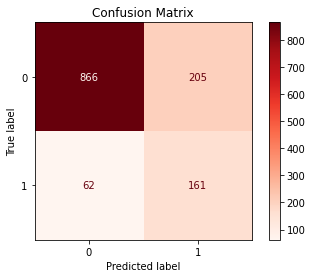

In [18]:
# Logistic regression model using dataset after SMOTE oversampling
# Generally better than the other two resampling methods, has a slightly higher test accuracy 
# but lower precision than the model trained using stratified sampling
model = LogisticRegression(random_state=0)
lrc_smote = model.fit(X_train_resample_smote, y_train_resample_smote)
predict_train_lrc_smote = lrc_smote.predict(X_train)
predict_test_lrc_smote = lrc_smote.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc_smote))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc_smote))

precision_smote = precision_score(y_true=y_test, y_pred= predict_test_lrc_smote)
print("Precision Score: %f" % precision_smote)
recall_smote = recall_score(y_true=y_test, y_pred= predict_test_lrc_smote)
print("Recall Score: %f" % recall_smote)
f1_smote = f1_score(y_true = y_test, y_pred = predict_test_lrc_smote)
print("F1 Score: %f" %f1_smote)
ConfusionMatrixDisplay.from_estimator(lrc_smote, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.8497679814385151
Production Accuracy: 0.8547140649149922
Precision Score: 0.654867
Recall Score: 0.331839
F1 Score: 0.440476


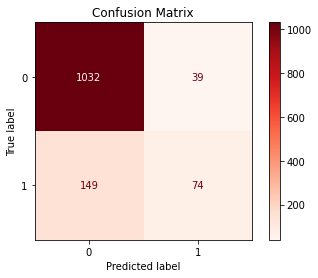

In [19]:
#PCA
model = LogisticRegression(random_state=0)
lrc_pca = model.fit(X_train_pca, y_train)
predict_train_lrc_pca = lrc_pca.predict(X_train_pca)
predict_test_lrc_pca = lrc_pca.predict(X_test_pca)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc_pca))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc_pca))

precision_pca = precision_score(y_true=y_test, y_pred= predict_test_lrc_pca)
print("Precision Score: %f" % precision_pca)
recall_pca = recall_score(y_true=y_test, y_pred= predict_test_lrc_pca)
print("Recall Score: %f" % recall_pca)
f1_pca = f1_score(y_true = y_test, y_pred = predict_test_lrc_pca)
print("F1 Score: %f" %f1_pca)
ConfusionMatrixDisplay.from_estimator(lrc_pca, X_test_pca, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

In [ ]:
fig = plot_roc_curve(lrc,  X_test, y_test, label = "Logistic Regression - No Sampling")
fig = plot_roc_curve(lrc_ros,  X_test, y_test, ax = fig.ax_, label = "Logistic Regressiont - Over Sampling")
fig = plot_roc_curve(lrc_rus,  X_test, y_test, ax = fig.ax_, label = "Logistic Regression - Under Sampling")
fig = plot_roc_curve(lrc_smote,  X_test, y_test, ax = fig.ax_, label = "Logistic Regression - SMOTE")
fig = plot_roc_curve(lrc_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Logistic Regression - PCA")
plt.title("ROC curve for Logistic Regression")
plt.show()

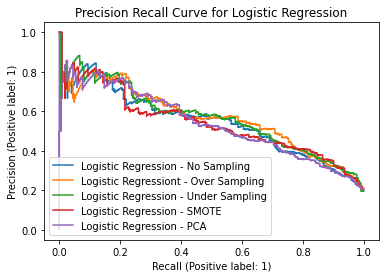

In [21]:
fig = plot_precision_recall_curve(lrc,  X_test, y_test, label = "Logistic Regression - No Sampling")
fig = plot_precision_recall_curve(lrc_ros,  X_test, y_test, ax = fig.ax_, label = "Logistic Regressiont - Over Sampling")
fig = plot_precision_recall_curve(lrc_rus,  X_test, y_test, ax = fig.ax_, label = "Logistic Regression - Under Sampling")
fig = plot_precision_recall_curve(lrc_smote,  X_test, y_test, ax = fig.ax_, label = "Logistic Regression - SMOTE")
fig = plot_precision_recall_curve(lrc_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Logistic Regression - PCA")
plt.title("Precision Recall Curve for Logistic Regression")
plt.show()

# Random Forest 

In [22]:
# model = RandomForestClassifier()
# rf_model = model.fit(X_train, y_train)
# predict_train_rf = rf_model.predict(X_train)
# predict_test_rf = rf_model.predict(X_test)
# print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
# print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

# precision = precision_score(y_true=y_test, y_pred= predict_test_rf)
# print("Precision Score: %f" % precision)
# recall = recall_score(y_true=y_test, y_pred= predict_test_rf)
# print("Recall Score: %f" % recall)
# f1 = f1_score(y_true = y_test, y_pred = predict_test_rf)
# print("F1 Score: %f" %f1)
# ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap = "Reds");

In [23]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [5, 10, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 'auto']
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(random_state=20), 
    param_grid=params,
    scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


Training Accuracy: 1.0
Production Accuracy: 0.8585780525502318
Precision Score: 0.822581
Recall Score: 0.228700
F1 Score: 0.357895


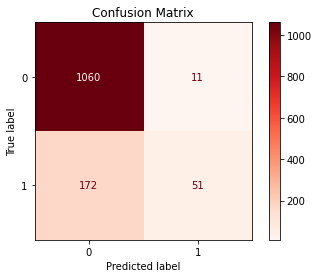

In [24]:
#re-training the model 
model = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'auto', min_samples_split= 2, n_estimators= 100)
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

precision = precision_score(y_true=y_test, y_pred= predict_test_rf)
print("Precision Score: %f" % precision)
recall = recall_score(y_true=y_test, y_pred= predict_test_rf)
print("Recall Score: %f" % recall)
f1 = f1_score(y_true = y_test, y_pred = predict_test_rf)
print("F1 Score: %f" %f1)

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.8211523588553751
Production Accuracy: 0.8013910355486863
Precision Score: 0.822581
Recall Score: 0.946188
F1 Score: 0.621502


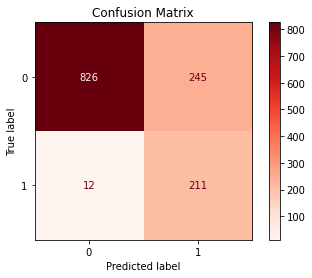

In [25]:
# Undersampling causes RF to make much more positive predictions but raises false positives as well
# and the overall precision score falls as a result 
model = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'auto', min_samples_split= 2, n_estimators= 100)
rf_model_rus = model.fit(X_train_resample_rus, y_train_resample_rus)
predict_train_rf_rus = rf_model_rus.predict(X_train)
predict_test_rf_rus = rf_model_rus.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf_rus))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf_rus))

precision_rus = precision_score(y_true=y_test, y_pred= predict_test_rf_rus)
print("Precision Score: %f" % precision)
recall_rus = recall_score(y_true=y_test, y_pred= predict_test_rf_rus)
print("Recall Score: %f" % recall_rus)
f1_rus = f1_score(y_true = y_test, y_pred = predict_test_rf_rus)
print("F1 Score: %f" %f1_rus)
ConfusionMatrixDisplay.from_estimator(rf_model_rus, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.9706109822119103
Production Accuracy: 0.9706336939721792
Precision Score: 0.951220
Recall Score: 0.874439
F1 Score: 0.911215


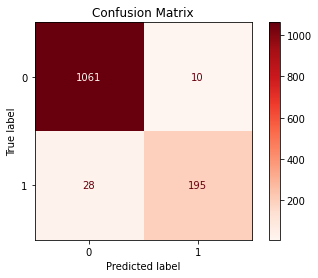

In [26]:
# Oversampling
model = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'auto', min_samples_split= 2, n_estimators= 100)
rf_model_ros = model.fit(X_train_resample_ros, y_train_resample_ros)
predict_train_rf_ros = rf_model_ros.predict(X_train)
predict_test_rf_ros = rf_model_ros.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf_ros))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf_ros))

precision_ros = precision_score(y_true=y_test, y_pred= predict_test_rf_ros)
print("Precision Score: %f" % precision_ros)
recall_ros = recall_score(y_true=y_test, y_pred= predict_test_rf_ros)
print("Recall Score: %f" % recall_ros)
f1_ros = f1_score(y_true = y_test, y_pred = predict_test_rf_ros)
print("F1 Score: %f" %f1_ros)
ConfusionMatrixDisplay.from_estimator(rf_model_ros, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.9708043310131477
Production Accuracy: 0.9675425038639877
Precision Score: 0.928910
Recall Score: 0.878924
F1 Score: 0.903226


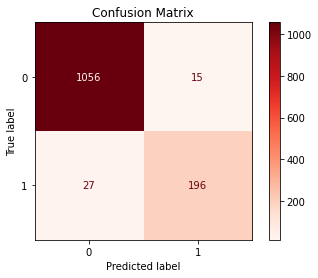

In [27]:
# SMOTE
model = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'auto', min_samples_split= 2, n_estimators= 100)
rf_model_smote = model.fit(X_train_resample_smote, y_train_resample_smote)
predict_train_rf_smote = rf_model_smote.predict(X_train)
predict_test_rf_smote = rf_model_smote.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf_smote))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf_smote))

precision_smote = precision_score(y_true=y_test, y_pred= predict_test_rf_smote)
print("Precision Score: %f" % precision_smote)
recall_smote = recall_score(y_true=y_test, y_pred= predict_test_rf_smote)
print("Recall Score: %f" % recall_smote)
f1_smote = f1_score(y_true = y_test, y_pred = predict_test_rf_smote)
print("F1 Score: %f" %f1_smote)

ConfusionMatrixDisplay.from_estimator(rf_model_smote, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 1.0
Production Accuracy: 0.839258114374034
Precision Score: 0.826087
Recall Score: 0.085202
F1 Score: 0.154472


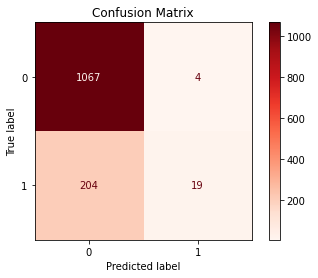

In [28]:
#PCA

model = RandomForestClassifier()
rf_model_pca = model.fit(X_train_pca, y_train)
predict_train_rf_pca = rf_model_pca.predict(X_train_pca)
predict_test_rf_pca = rf_model_pca.predict(X_test_pca)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf_pca))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_rf_pca))

precision_pca = precision_score(y_true=y_test, y_pred= predict_test_rf_pca)
print("Precision Score: %f" % precision_pca)

recall_pca = recall_score(y_true=y_test, y_pred= predict_test_rf_pca)
print("Recall Score: %f" % recall_pca)

f1_pca = f1_score(y_true = y_test, y_pred = predict_test_rf_pca)
print("F1 Score: %f" %f1_pca)
ConfusionMatrixDisplay.from_estimator(rf_model_pca, X_test_pca, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

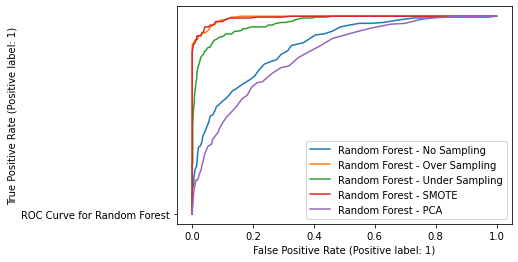

In [29]:
fig = plot_roc_curve(rf_model,  X_test, y_test, label = "Random Forest - No Sampling")
fig = plot_roc_curve(rf_model_ros,  X_test, y_test, ax = fig.ax_, label = "Random Forest - Over Sampling")
fig = plot_roc_curve(rf_model_rus,  X_test, y_test, ax = fig.ax_, label = "Random Forest - Under Sampling")
fig = plot_roc_curve(rf_model_smote,  X_test, y_test, ax = fig.ax_, label = "Random Forest - SMOTE")
fig = plot_roc_curve(rf_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Random Forest - PCA")
plt.plot('ROC Curve for Random Forest')
plt.show()

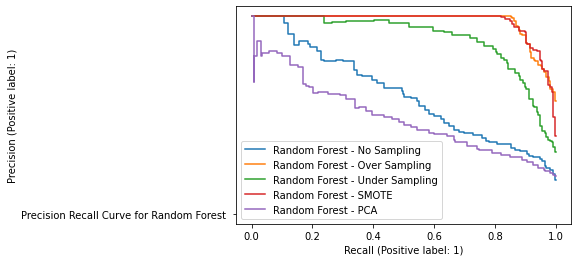

In [30]:
fig = plot_precision_recall_curve(rf_model,  X_test, y_test, label = "Random Forest - No Sampling")
fig = plot_precision_recall_curve(rf_model_ros,  X_test, y_test, ax = fig.ax_, label = "Random Forest - Over Sampling")
fig = plot_precision_recall_curve(rf_model_rus,  X_test, y_test, ax = fig.ax_, label = "Random Forest - Under Sampling")
fig = plot_precision_recall_curve(rf_model_smote,  X_test, y_test, ax = fig.ax_, label = "Random Forest - SMOTE")
fig = plot_precision_recall_curve(rf_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Random Forest - PCA")
plt.plot('Precision Recall Curve for Random Forest ')
plt.show()

# SVM


In [31]:
# Hyperparameter tuning for Support Vector Machine
params = {
    'kernel': ['rbf', 'sigmoid'],
    "C": [10, 1, 0.1],
    'gamma': ['scale', 'auto', 1, 0.1], 
}

grid_search_cv = GridSearchCV( 
    estimator=SVC(random_state = 20), 
    param_grid=params,
    scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Training Accuracy: 0.8546017014694509
Production Accuracy: 0.8554868624420402
Precision Score: 0.833333
Recall Score: 0.201794
F1 Score: 0.324910


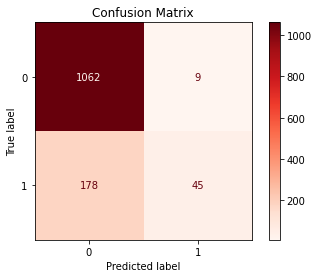

In [32]:
model = SVC(C = 10, gamma = "scale", kernel = "rbf")
svm_model = model.fit(X_train, y_train)
predict_train_svm = svm_model.predict(X_train)
predict_test_svm = svm_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svm))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_svm))

precision = precision_score(y_true=y_test, y_pred= predict_test_svm)
print("Precision Score: %f" % precision)
recall = recall_score(y_true = y_test, y_pred = predict_test_svm)
print("Recall Score: %f" % recall)
f1 = f1_score(y_true = y_test, y_pred = predict_test_svm)
print("F1 Score: %f" % f1)

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.7588940448569219
Production Accuracy: 0.7357032457496137
Precision Score: 0.378323
Recall Score: 0.829596
F1 Score: 0.519663


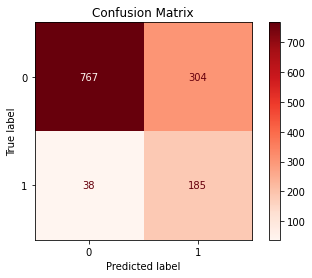

In [33]:
model = SVC(C = 10, gamma = "scale", kernel = "rbf")
svm_model_rus = model.fit(X_train_resample_rus, y_train_resample_rus)
predict_train_svm_rus = svm_model_rus.predict(X_train)
predict_test_svm_rus = svm_model_rus.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svm_rus))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_svm_rus))

precision_rus = precision_score(y_true=y_test, y_pred= predict_test_svm_rus)
print("Precision Score: %f" % precision_rus)
recall_rus = recall_score(y_true = y_test, y_pred = predict_test_svm_rus)
print("Recall Score: %f" % recall_rus)
f1_rus = f1_score(y_true = y_test, y_pred = predict_test_svm_rus)
print("F1 Score: %f" % f1_rus)

ConfusionMatrixDisplay.from_estimator(svm_model_rus, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.8083913379737045
Production Accuracy: 0.7936630602782071
Precision Score: 0.448598
Recall Score: 0.860987
F1 Score: 0.589862


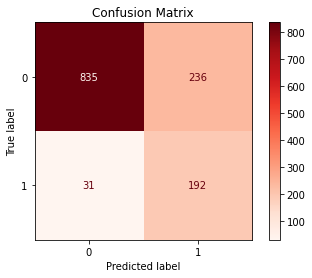

In [34]:
model = SVC(C = 10, gamma = "scale", kernel = "rbf")
svm_model_ros = model.fit(X_train_resample_ros, y_train_resample_ros)
predict_train_svm_ros = svm_model_ros.predict(X_train)
predict_test_svm_ros = svm_model_ros.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svm_ros))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_svm_ros))

precision_ros = precision_score(y_true=y_test, y_pred= predict_test_svm_ros)
print("Precision Score: %f" % precision_ros)
recall_ros = recall_score(y_true = y_test, y_pred = predict_test_svm_ros)
print("Recall Score: %f" % recall_ros)
f1_ros = f1_score(y_true = y_test, y_pred = predict_test_svm_ros)
print("F1 Score: %f" % f1_ros)

ConfusionMatrixDisplay.from_estimator(svm_model_ros, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.834106728538283
Production Accuracy: 0.8369397217928902
Precision Score: 0.516949
Recall Score: 0.820628
F1 Score: 0.634315


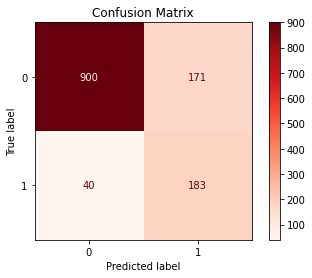

In [35]:
# SMOTE
model = SVC(C = 10, gamma = "scale", kernel = "rbf")
svm_model_smote = model.fit(X_train_resample_smote, y_train_resample_smote)
predict_train_svm_smote = svm_model_smote.predict(X_train)
predict_test_svm_smote = svm_model_smote.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svm_smote))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_svm_smote))

precision_smote = precision_score(y_true=y_test, y_pred= predict_test_svm_smote)
print("Precision Score: %f" % precision_smote)
recall_smote = recall_score(y_true = y_test, y_pred = predict_test_svm_smote)
print("Recall Score: %f" % recall_smote)
f1_smote = f1_score(y_true = y_test, y_pred = predict_test_svm_smote)
print("F1 Score: %f" % f1_smote)
ConfusionMatrixDisplay.from_estimator(svm_model_smote, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.9617169373549884
Production Accuracy: 0.8423493044822257
Precision Score: 0.556213
Recall Score: 0.421525
F1 Score: 0.479592
Precision Score: 0.421525


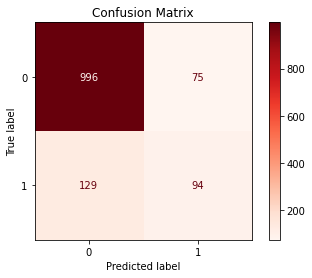

In [36]:
#PCA
model = SVC(C = 10, gamma = "scale", kernel = "rbf")
svm_model_pca = model.fit(X_train_pca, y_train)
predict_train_svm_pca = svm_model_pca.predict(X_train_pca)
predict_test_svm_pca = svm_model_pca.predict(X_test_pca)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svm_pca))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_svm_pca))

precision = precision_score(y_true=y_test, y_pred= predict_test_svm_pca)
print("Precision Score: %f" % precision)
recall_pca = recall_score(y_true = y_test, y_pred = predict_test_svm_pca)
print("Recall Score: %f" % recall_pca)
f1_pca = f1_score(y_true = y_test, y_pred = predict_test_svm_pca)
print("F1 Score: %f" % f1_pca)
recall_pca = recall_score(y_true=y_test, y_pred= predict_test_svm_pca)
print("Precision Score: %f" % recall_pca)
ConfusionMatrixDisplay.from_estimator(svm_model_pca, X_test_pca, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

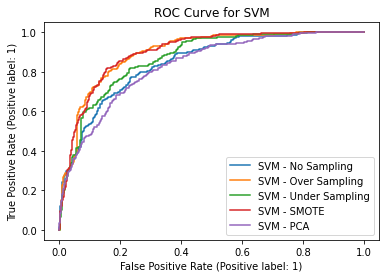

In [37]:
fig = plot_roc_curve(svm_model,  X_test, y_test, label = "SVM - No Sampling")
fig = plot_roc_curve(svm_model_ros,  X_test, y_test, ax = fig.ax_, label = "SVM - Over Sampling")
fig = plot_roc_curve(svm_model_rus,  X_test, y_test, ax = fig.ax_, label = "SVM - Under Sampling")
fig = plot_roc_curve(svm_model_smote,  X_test, y_test, ax = fig.ax_, label = "SVM - SMOTE")
fig = plot_roc_curve(svm_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "SVM - PCA")
plt.title("ROC Curve for SVM")
plt.show()

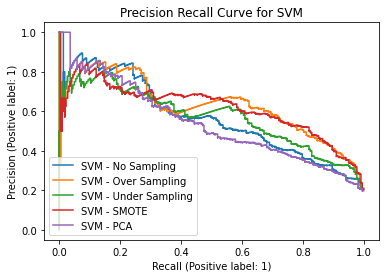

In [38]:
fig = plot_precision_recall_curve(svm_model,  X_test, y_test, label = "SVM - No Sampling")
fig = plot_precision_recall_curve(svm_model_ros,  X_test, y_test, ax = fig.ax_, label = "SVM - Over Sampling")
fig = plot_precision_recall_curve(svm_model_rus,  X_test, y_test, ax = fig.ax_, label = "SVM - Under Sampling")
fig = plot_precision_recall_curve(svm_model_smote,  X_test, y_test, ax = fig.ax_, label = "SVM - SMOTE")
fig = plot_precision_recall_curve(svm_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "SVM - PCA")
plt.title("Precision Recall Curve for SVM")
plt.show()

# Gradient Boosting

Training Accuracy: 0.8834106728538283
Production Accuracy: 0.8632148377125193
Precision Score: 0.664286
Recall Score: 0.417040
F1 Score: 0.512397


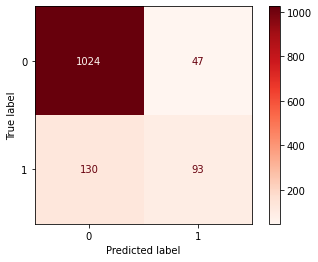

In [39]:
model = GradientBoostingClassifier()
gb_model = model.fit(X_train, y_train)
predict_train_gb = gb_model.predict(X_train)
predict_test_gb = gb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_gb))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_gb))

precision = precision_score(y_true=y_test, y_pred= predict_test_gb)
print("Precision Score: %f" % precision)
recall = recall_score(y_true = y_test, y_pred = predict_test_gb)
print("Recall Score: %f" % recall)
f1 = f1_score(y_true = y_test, y_pred = predict_test_gb)
print("F1 Score: %f" % f1)
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.7780355761794276
Production Accuracy: 0.7511591962905718
Precision Score: 0.400402
Recall Score: 0.892377
F1 Score: 0.552778


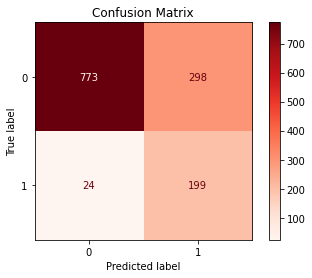

In [40]:
model = GradientBoostingClassifier()
gb_model_rus = model.fit(X_train_resample_rus, y_train_resample_rus)
predict_train_gb_rus = gb_model_rus.predict(X_train)
predict_test_gb_rus = gb_model_rus.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_gb_rus))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_gb_rus))

precision_rus = precision_score(y_true=y_test, y_pred= predict_test_gb_rus)
print("Precision Score: %f" % precision_rus)
recall_rus = recall_score(y_true = y_test, y_pred = predict_test_gb_rus)
print("Recall Score: %f" % recall_rus)
f1_rus = f1_score(y_true = y_test, y_pred = predict_test_gb_rus)
print("F1 Score: %f" % f1_rus)
ConfusionMatrixDisplay.from_estimator(gb_model_rus, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.8246326372776489
Production Accuracy: 0.8060278207109737
Precision Score: 0.466184
Recall Score: 0.865471
F1 Score: 0.605965


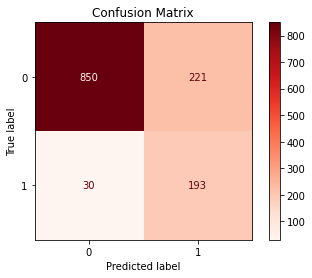

In [41]:
model = GradientBoostingClassifier()
gb_model_ros = model.fit(X_train_resample_ros, y_train_resample_ros)
predict_train_gb_ros = gb_model_ros.predict(X_train)
predict_test_gb_ros = gb_model_ros.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_gb_ros))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_gb_ros))

precision_ros = precision_score(y_true=y_test, y_pred= predict_test_gb_ros)
print("Precision Score: %f" % precision_ros)
recall_ros = recall_score(y_true = y_test, y_pred = predict_test_gb_ros)
print("Recall Score: %f" % recall_ros)
f1_ros = f1_score(y_true = y_test, y_pred = predict_test_gb_ros)
print("F1 Score: %f" % f1_ros)
ConfusionMatrixDisplay.from_estimator(gb_model_ros, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.871616395978345
Production Accuracy: 0.874806800618238
Precision Score: 0.661376
Recall Score: 0.560538
F1 Score: 0.606796


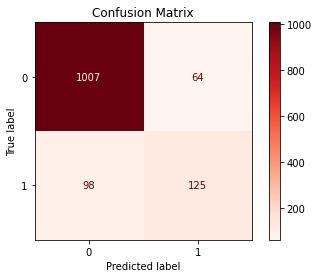

In [42]:
# SMOTE
model = GradientBoostingClassifier()
gb_model_smote = model.fit(X_train_resample_smote, y_train_resample_smote)
predict_train_gb_smote = gb_model_smote.predict(X_train)
predict_test_gb_smote = gb_model_smote.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_gb_smote))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_gb_smote))

precision_smote = precision_score(y_true=y_test, y_pred= predict_test_gb_smote)
print("Precision Score: %f" % precision_smote)
recall_smote = recall_score(y_true = y_test, y_pred = predict_test_gb_smote)
print("Recall Score: %f" % recall_smote)
f1_smote = f1_score(y_true = y_test, y_pred = predict_test_gb_smote)
print("F1 Score: %f" % f1_smote)
ConfusionMatrixDisplay.from_estimator(gb_model_smote, X_test, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 0.888631090487239
Production Accuracy: 0.8446676970633694
Precision Score: 0.630952
Recall Score: 0.237668
F1 Score: 0.345277


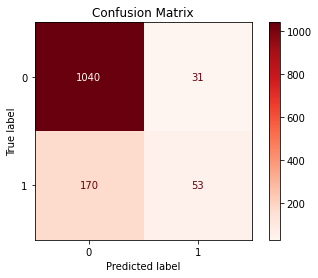

In [43]:
#PCA
model = GradientBoostingClassifier()
gb_model_pca = model.fit(X_train_pca, y_train)
predict_train_gb_pca = gb_model_pca.predict(X_train_pca)
predict_test_gb_pca = gb_model_pca.predict(X_test_pca)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_gb_pca))
print('Production Accuracy:', metrics.accuracy_score(y_test, predict_test_gb_pca))

precision_smote = precision_score(y_true=y_test, y_pred= predict_test_gb_pca)
print("Precision Score: %f" % precision_smote)
recall_pca = recall_score(y_true = y_test, y_pred = predict_test_gb_pca)
print("Recall Score: %f" % recall_pca)
f1_pca = f1_score(y_true = y_test, y_pred = predict_test_gb_pca)
print("F1 Score: %f" % f1_pca)

ConfusionMatrixDisplay.from_estimator(gb_model_pca, X_test_pca, y_test, cmap = "Reds");
plt.title("Confusion Matrix")
plt.show()

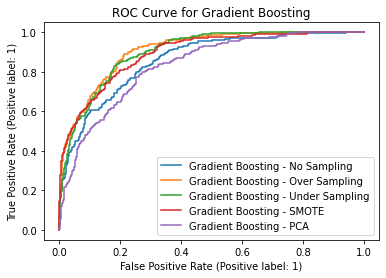

In [44]:
fig = plot_roc_curve(gb_model,  X_test, y_test, label = "Gradient Boosting - No Sampling")
fig = plot_roc_curve(gb_model_ros,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - Over Sampling")
fig = plot_roc_curve(gb_model_rus,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - Under Sampling")
fig = plot_roc_curve(gb_model_smote,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - SMOTE")
fig = plot_roc_curve(gb_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Gradient Boosting - PCA")
plt.title("ROC Curve for Gradient Boosting")
plt.show()

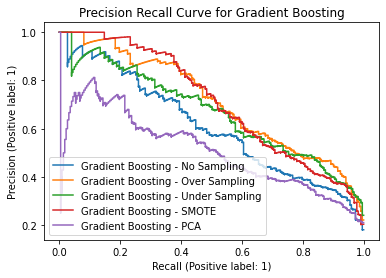

In [45]:
fig = plot_precision_recall_curve(gb_model,  X_test, y_test, label = "Gradient Boosting - No Sampling")
fig = plot_precision_recall_curve(gb_model_ros,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - Over Sampling")
fig = plot_precision_recall_curve(gb_model_rus,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - Under Sampling")
fig = plot_precision_recall_curve(gb_model_smote,  X_test, y_test, ax = fig.ax_, label = "Gradient Boosting - SMOTE")
fig = plot_precision_recall_curve(gb_model_pca,  X_test_pca, y_test, ax = fig.ax_, label = "Gradient Boosting - PCA")
plt.title("Precision Recall Curve for Gradient Boosting")
plt.show()

In [47]:
feature_imp_rf = pd.Series(rf_model_smote.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp_rf[:20]

like                          0.044359
funny_o                       0.042450
d_like                        0.041206
attractive_o                  0.036651
d_shared_interests_partner    0.036375
d_shared_interests_o          0.035734
d_attractive_o                0.031846
d_guess_prob_liked            0.030068
d_funny_o                     0.026668
funny_partner                 0.026561
d_funny_partner               0.024633
attractive_partner            0.022584
guess_prob_liked              0.022295
d_attractive_partner          0.021820
sincere_partner               0.015997
intelligence_partner          0.013576
sinsere_o                     0.013414
intelligence_o                0.012823
d_expected_num_matches        0.012724
d_ambitous_o                  0.011689
dtype: float64

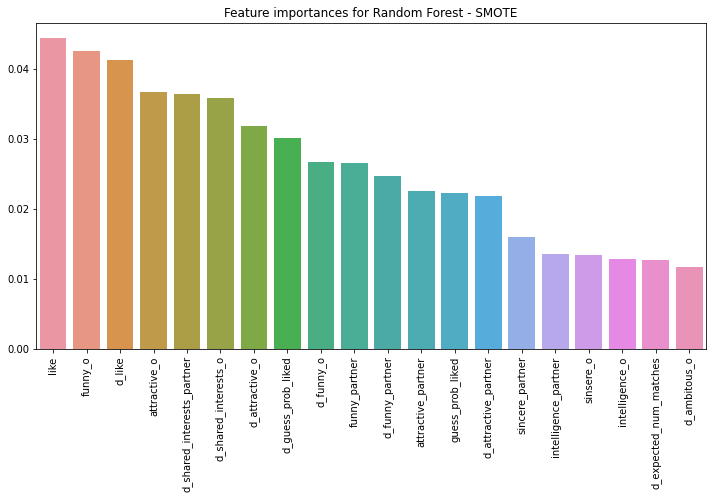

In [48]:
plt.figure(figsize = (12, 6))
sns.barplot(feature_imp_rf[:20].index, feature_imp_rf[:20].values)
plt.tick_params(axis='x', rotation=90)
plt.title("Feature importances for Random Forest - SMOTE")
plt.show()

In [49]:
feature_imp_gb = pd.Series(gb_model_smote.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp_gb[:20]

like                                  0.152756
d_shared_interests_o                  0.151352
d_shared_interests_partner            0.150323
funny_o                               0.079213
d_attractive_o                        0.078349
d_guess_prob_liked                    0.064096
attractive_o                          0.056792
d_like                                0.049554
attractive_partner                    0.027149
d_expected_num_matches                0.025808
d_attractive_partner                  0.023486
d_funny_o                             0.021653
funny_partner                         0.019427
d_pref_o_intelligence                 0.012223
d_d_age                               0.006293
d_movies                              0.005221
guess_prob_liked                      0.004165
d_funny_partner                       0.004059
race_o_European/Caucasian-American    0.003948
met                                   0.003763
dtype: float64

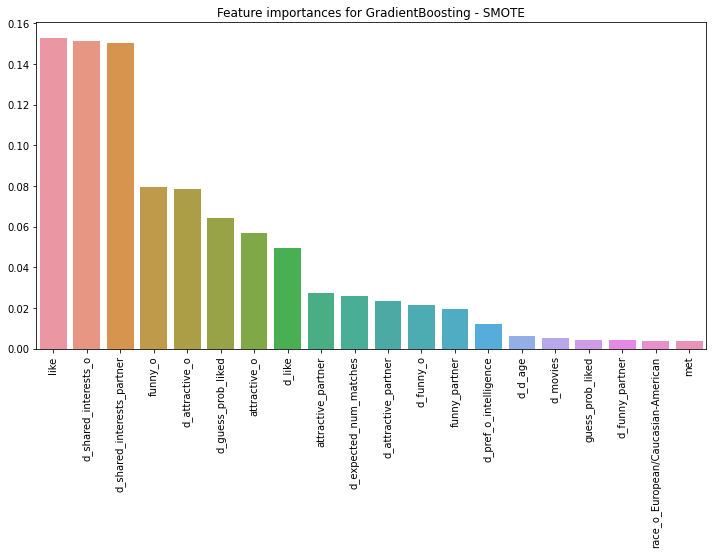

In [50]:
plt.figure(figsize = (12, 6))
sns.barplot(feature_imp_gb[:20].index, feature_imp_gb[:20].values)
plt.tick_params(axis='x', rotation=90)
plt.title("Feature importances for GradientBoosting - SMOTE")
plt.show()